In [2]:
import os

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DATASET :SMS Spam Collection :The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.  Content The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.  This corpus has been collected from free or free for research sources at the Internet:   A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. 

## Read  file

In [4]:
df = pd.read_csv('C:\\Users\\amgupta\\OneDrive - Microsoft\\Python_Temp\\16\\TA\\spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Data set description and visualize ham and spam count

In [5]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

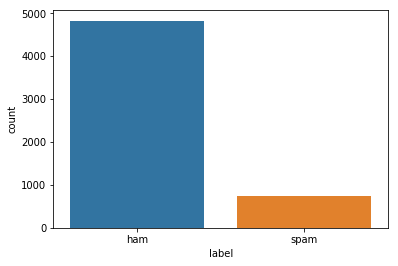

In [6]:
sns.countplot(data=df, x='label')

## To create spam filter : 
### Clean and Normalize text Convert text into vectors (using bag of words model) that machine learning models can understand.
Train and test Classifier Clean and normalize text 
It will be done in following steps:  
- Remove punctuations 
- Remove all stopwords 
- Apply stemming (converting to normal form of word).  
  For example, 'driving car' and 'drives car' becomes drive car

### Write a method to return normailzed text in form of tokens (lemmas)

In [7]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    
    # return token list
    return text

In [10]:
process('I am going to Hyderabad !!!')

['go', 'hyderabad']

In [8]:
# Testing
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

### Test with our dataset

In [9]:
# Test with our dataset
df['message'][:20].apply(process)

0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, watch]
17    [eh, u, rememb, 2, spell, name, ye, v, nau

### Convert each message to vectors that machine learning models can understand. 

We will do that using bag-of-words model  
We will use TfidfVectorizer. It will convert collection of text documents (SMS corpus) into 2D matrix.  One dimension represent documents and other dimension repesents each unique word in SMS corpus . .  

If nth term t has occured p times in mth document, (m, n) value in this matrix will be TF-IDF(t),   

where [TF-IDF(t)](https://en.wikipedia.org/wiki/Tf–idf) = Term Frequency (TF) * Inverse Document Frequency (IDF)  Term Frequency (TF) is a measure of how frequent a term occurs in a document.  TF(t)= Number of times term t appears in document (p) / Total number of terms in that document  Inverse Document Frequency (IDF) is measure of how important term is. 

For TF, all terms are equally treated. But, in IDF, for words that occur frequently like 'is' 'the' 'of' are assigned less weight. While terms that occur rarely that can easily help identify class of input features will be weighted high.  Inverse Document Frequency, IDF(t)= loge(Total number of documents / Number of documents with term t in it)  At end we will have for every message, vectors normalized to unit length equal to size of vocalbulary (number of unique terms from entire SMS corpus)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Fit and transform SMS corpus

In [12]:
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['message'])

In [16]:
print(data[5:20])

  (0, 5163)	0.14927789518864504
  (0, 3099)	0.2619594860603665
  (0, 3556)	0.1823936981947932
  (0, 2301)	0.2799722422538804
  (0, 517)	0.2028231783430636
  (0, 7615)	0.17888800689645606
  (0, 7771)	0.20844580948798538
  (0, 1342)	0.17197197887512358
  (0, 3750)	0.22739787806278594
  (0, 4322)	0.1540953727694651
  (0, 3151)	0.2285395329800025
  (0, 6666)	0.170731031846155
  (0, 6901)	0.29740977983510175
  (0, 7901)	0.22739787806278594
  (0, 6643)	0.2716934251981628
  (0, 1929)	0.3163618484099023
  (0, 6195)	0.1605491895946896
  (0, 8044)	0.23349366212342992
  (0, 5826)	0.3163618484099023
  (1, 4322)	0.4308131677112723
  (1, 2795)	0.26700632601835994
  (1, 1669)	0.34131563987319075
  (1, 6541)	0.3133619420394793
  (1, 7215)	0.34384601902147
  (1, 1032)	0.4422353754267648
  :	:
  (13, 7289)	0.12521546275515694
  (13, 2974)	0.24670261463550688
  (13, 6992)	0.7012811905405189
  (13, 7590)	0.42903189940026254
  (13, 2935)	0.2205724439373421
  (13, 3326)	0.38013858109567755
  (13, 1325)	0.23

### Lets check what values it gives for a message

In [12]:
mess = df.iloc[2]['message']
print(mess)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [13]:
print(tfidfv.transform([mess]))

  (0, 7741)	0.18906287739887084
  (0, 7708)	0.14471405235314777
  (0, 7276)	0.12336193745345178
  (0, 7099)	0.2190885570936267
  (0, 6959)	0.11759458460817876
  (0, 5856)	0.16027970945850903
  (0, 5815)	0.2330497030932461
  (0, 5768)	0.2330497030932461
  (0, 4592)	0.15903719770411495
  (0, 3091)	0.11505037200973967
  (0, 2969)	0.16669800498830506
  (0, 2868)	0.4660994061864922
  (0, 2748)	0.3571909758763146
  (0, 2246)	0.20302402339849024
  (0, 2076)	0.19516151371199045
  (0, 1180)	0.16669800498830506
  (0, 833)	0.2190885570936267
  (0, 433)	0.22518719340674634
  (0, 420)	0.22518719340674634
  (0, 413)	0.09987750376879972
  (0, 72)	0.2330497030932461


### For better View

In [14]:
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names()[i])

index	idf	tfidf	term
72 8.5271 0.2330 08452810075over18
413 3.6544 0.0999 2
420 8.2394 0.2252 2005
433 8.2394 0.2252 21st
833 8.0163 0.2191 87121
1180 6.0993 0.1667 appli
2076 7.1408 0.1952 comp
2246 7.4285 0.2030 cup
2748 6.5346 0.3572 entri
2868 8.5271 0.4661 fa
2969 6.0993 0.1667 final
3091 4.2096 0.1151 free
4592 5.8190 0.1590 may
5768 8.5271 0.2330 questionstd
5815 8.5271 0.2330 ratetc
5856 5.8645 0.1603 receiv
6959 4.3027 0.1176 text
7099 8.0163 0.2191 tkt
7276 4.5137 0.1234 txt
7708 5.2950 0.1447 win
7741 6.9176 0.1891 wkli


### Having messages in form of vectors, we are ready to train our classifier.  We will use Naive Bayes which is well known classifier while working with text data.  Before that we will use pipeline feature of sklearn to create a pipeline of TfidfVectorizer followed by Classifier. 

### Input will be message passed to first stage TfidfVectorizer which will transform it and pass it to Naive Bayes Classifier to get output label

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

### Perform train test split

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)

### Train spam_filter

In [17]:
spam_filter.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer=<function process at 0x000001E2D47AA950>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2'...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predict for test cases

In [18]:
predictions = spam_filter.predict(x_test)

In [19]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 39


### Check for wrong predictions that were classified as ham

In [20]:
x_test[y_test != predictions]

419     Send a logo 2 ur lover - 2 names joined by a h...
3139    sexy sexy cum and text me im wet and warm and ...
3790    Twinks, bears, scallies, skins and jocks are c...
2877    Hey Boys. Want hot XXX pics sent direct 2 ur p...
2377    YES! The only place in town to meet exciting a...
1499    SMS. ac JSco: Energy is high, but u may not kn...
3417    LIFE has never been this much fun and great un...
3358    Sorry I missed your call let's talk when you h...
2412    I don't know u and u don't know me. Send CHAT ...
3862    Oh my god! I've found your number again! I'm s...
659     88800 and 89034 are premium phone services cal...
3109    Good Luck! Draw takes place 28th Feb 06. Good ...
5466    http//tms. widelive.com/index. wml?id=820554ad...
1268    Can U get 2 phone NOW? I wanna chat 2 set up m...
491     Congrats! 1 year special cinema pass for 2 is ...
2246    Hi ya babe x u 4goten bout me?' scammers getti...
2828    Send a logo 2 ur lover - 2 names joined by a h...
3528    Xmas &

### Use classification report to get more details

In [21]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1014
       spam       0.72      1.00      0.84       101

avg / total       0.97      0.97      0.97      1115



### Looking at precision column (for ham, it is 1.00), we can say that all number of wrong predictions (in output of [18]) came from spam predicted as ham. It is ok and cost of predicting spam as ham is negligible to that of predicting ham as spam.  Function to predict whether passed message is ham or spam

In [22]:
def detect_spam(s):
    return spam_filter.predict([s])[0]

detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'